In [4]:
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import splitfolders
import cv2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, models


In [5]:
input_folder = '/Users/jeffreyacquah/what_dog_am_i/customdataset'
output_folder = '/Users/jeffreyacquah/what_dog_am_i/imagerecognition'

split_ratio = (0.8,0.1,0.1)

splitfolders.ratio(

    input_folder,
    output=output_folder,
    seed=500,
    ratio = split_ratio,
    group_prefix = None
)

In [6]:
img_size = (224,224)
batch_size = 32 # Model updates weights after processing 32 images

train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)

In [7]:
# Rescale pixel values, without any extra augmentation processes for test and validation data

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)



In [8]:
train_dir = os.path.join(output_folder, 'train')
val_dir = os.path.join(output_folder, 'val')
test_dir = os.path.join(output_folder, 'test')

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)

valid_data = valid_datagen.flow_from_directory(
    val_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 320 images belonging to 5 classes.
Found 44 images belonging to 5 classes.
Found 39 images belonging to 5 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].


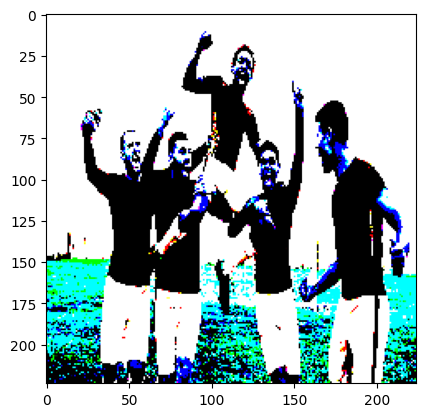

In [9]:
images, labels = next(valid_data)
idx = random.randint(0,images.shape[0]-1)

plt.imshow(images[idx])
plt.show()

In [10]:
from keras.applications.resnet import ResNet50
base_model = ResNet50(weights='imagenet',include_top=False, input_shape=(img_size[0], img_size[1], 3))

base_model.trainable = False # Only trains newly added classification layers
                      

In [11]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')


])

In [12]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
model.fit(train_data, epochs = 25, validation_data = valid_data)

/Users/jeffreyacquah/what_dog_am_i/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 825ms/step - accuracy: 0.3483 - loss: 1.9056

/Users/jeffreyacquah/what_dog_am_i/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.3969 - loss: 1.7037 - val_accuracy: 0.5897 - val_loss: 0.9646
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 919ms/step - accuracy: 0.6781 - loss: 0.9384 - val_accuracy: 0.7179 - val_loss: 0.7746
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7500 - loss: 0.6756 - val_accuracy: 0.7692 - val_loss: 0.6797
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7812 - loss: 0.6313 - val_accuracy: 0.7949 - val_loss: 0.6142
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 994ms/step - accuracy: 0.8094 - loss: 0.5467 - val_accuracy: 0.7692 - val_loss: 0.5915
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 944ms/step - accuracy: 0.8219 - loss: 0.5074 - val_accuracy: 0.7949 - val_loss: 0.5618
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 937ms/step - accuracy: 0.8156 - loss: 0.4306 - val_accuracy: 0.7692 - val_loss: 0.5220
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 937ms/step - accuracy: 0.8719 - loss: 0.3920 - val_accuracy: 0.8205 - val_loss:

In [14]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step - accuracy: 0.7955 - loss: 0.6466
Test Accuracy: 79.55%


In [15]:
class_names = {0: 'eyesclosed',
               1: 'perplexed',
               2: 'scream',
               3: 'smile',
               4: 'tongue'}

In [16]:
def predict_img(image,model):
    test_img=cv2.imread(image)
    test_img=cv2.resize(test_img,(224,224))
    test_img=np.expand_dims(test_img,axis=0)
    result=model.predict(test_img)
    r = np.argmax(result)
    print(class_names[r])

In [27]:
predict_img('customdataset/tongue/tongue_2.jpeg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
tongue


In [28]:
model.save('CustomNetworkv1.keras')